### This notebook will work through the steps necessary to gather Toronto neighborhood data, identify geo coordinates, and visualize clustered areas within the Toronto region as part of the Applied Data Science Capstone project assignment on Coursera

#### Isaac Injeti - Jan 9th, 2019

Step 1: Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe

Step 2: To create the dataframe:

The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

Step 3: Submit a link to your Notebook on your Github repository. (10 marks)

In [1]:
#Import necessary libraries and packages
import requests
import pandas as pd

In [2]:
#Set url to wikipedia site where the html table is located
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [3]:
#Use Pandas' built-in 'read_html' function to load the table data from html into a dataframe
df = pd.read_html(url)

#set our df = to the first table loaded from the html
df = df[0].dropna(axis=0, thresh=0)

#set the names of the columns based on the first row in the dataframe and delete the original index
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0))
df.head()

,Postcode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront


In [4]:
#Now drop the rows where a Borough is not assigned
df = df.drop(df[df.Borough == 'Not assigned'].index)

In [5]:
#Filter dataframe on any rows with Neighbourhood as 'Not assigned'
df[df.Neighbourhood=='Not assigned']

,Postcode,Borough,Neighbourhood
9,M7A,Queen's Park,Not assigned


In [6]:
#set value of row to Borough instead of "Not assigned"
df.Neighbourhood[9]=df.Borough[9]

#check row to validate Neighbourhood was updated as expected.
df.Neighbourhood[9]

"Queen's Park"

In [7]:
#Filter dataframe again on any rows with Neighbourhood having 'Not assigned' to confirm all are clear
df[df.Neighbourhood=='Not assigned']

,Postcode,Borough,Neighbourhood


In [8]:
#Next before we loop through duplicate Boroughs and consolidate the Neighbourhoods, we will first sort and reset index
df.sort_values('Postcode',inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
#Now we will loop through each row in the df and append the Neighbourhood to the contents of the duplicate row
for index, row in df.iterrows():
    if index > 0:
        if df.at[index-1,'Postcode'] == row['Postcode']:
            row['Neighbourhood'] = row['Neighbourhood']+', '+df.at[index-1,'Neighbourhood']
    else:
        pass

In [10]:
#The loop above will return appended string of each duplicate in the last row for each unique Postcode
#To get the df to our desired final state we need to clean up the duplicates keeping only the last row for each code
df.drop_duplicates(subset='Postcode',keep='last',inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(103, 3)

### Part 1 - Dataframe

In [11]:
#Here is our final prepared dataframe ready for the next step.
df.head(15)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"West Hill, Morningside, Guildwood"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Clairlea, Oakridge, Golden Mile"
8,M1M,Scarborough,"Cliffside, Scarborough Village West, Cliffcrest"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


### Example Image:

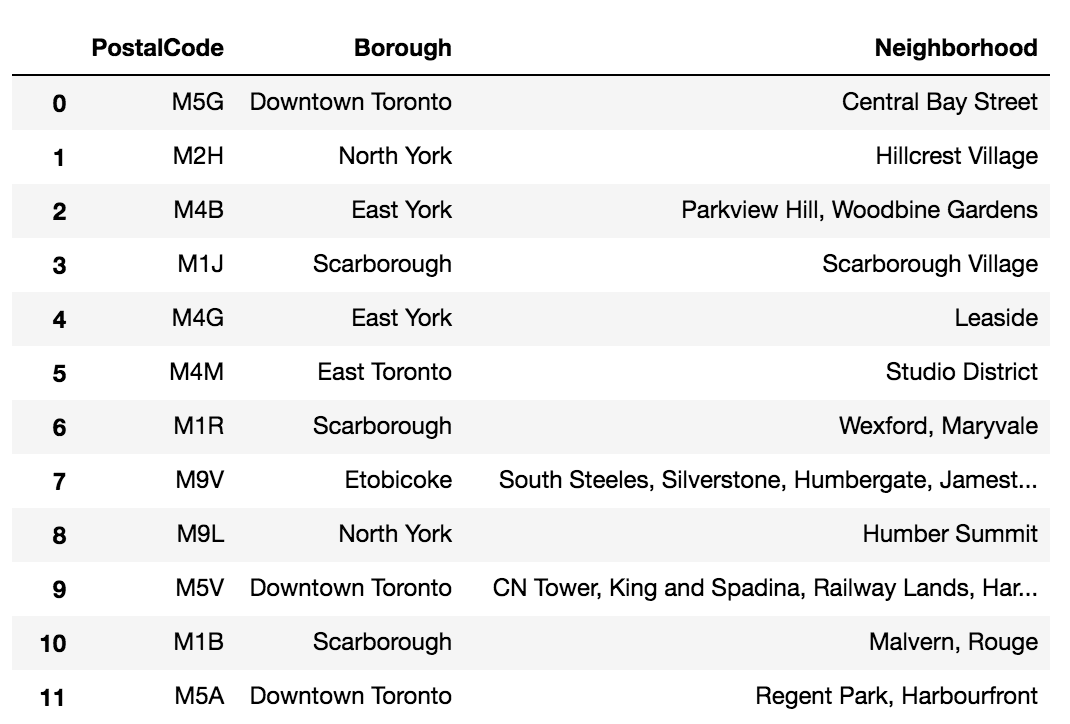